In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.models import Sequential

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [2]:
from imutils import paths

In [3]:
imagePaths = sorted(list(paths.list_images("F:/ADITYA SIR/ROSE - CNN")))

# random shuffle
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
image_dims = (224, 224, 3)
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    data.append(image)
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)
    
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

4342 images (5106.19MB)


In [4]:
data = np.array(data)
label = np.array(labels)
print(data.shape)

(4342, 224, 224, 3)


In [5]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# total 4 labels
print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

class labels:
1. Black Spot
2. Downy Mildew
3. Fresh Leaf


In [6]:
def MobileNetV2_model(learning_rate, input_shape,class_number):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))

    return model

In [7]:
bs = 32
lr = 0.0001
size = (224, 224)
shape = (224,224, 3) 
epochs = 10
class_number = 3

In [8]:
model = MobileNetV2_model(lr,shape,class_number)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

C:\Users\ARIF\AppData\Local\Temp\ipykernel_23400\178479128.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))


In [9]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20)

In [10]:
print("[INFO] training ...")
H = model.fit(trainX, trainY, batch_size=32,steps_per_epoch=len(trainX) // 32,	validation_data=(testX, testY),	validation_steps=len(testX) // 32,	epochs=20)

[INFO] training ...
Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6623 - loss: 1.3448 - val_accuracy: 0.8970 - val_loss: 0.2541
Epoch 2/20
  1/108 ━━━━━━━━━━━━━━━━━━━━ 1:23 781ms/step - accuracy: 0.8824 - loss: 0.2347

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8824 - loss: 0.2347 - val_accuracy: 1.0000 - val_loss: 0.0979
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8770 - loss: 0.3398 - val_accuracy: 0.9444 - val_loss: 0.1663
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 0.0438
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9320 - loss: 0.1905 - val_accuracy: 0.9630 - val_loss: 0.1458
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7647 - loss: 0.5631 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9570 - loss: 0.1250 - val_accuracy: 0.9433 - val_loss: 0.2633
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9412 - loss: 0.1645 - val_accuracy: 1.0000 - val_loss: 5.9604e-06
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9678 - loss: 0.1182 - val_accuracy: 0.967

In [11]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=mlb.classes_))

[INFO] evaluating network...
28/28 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step
              precision    recall  f1-score   support

  Black Spot       0.93      0.97      0.95       303
Downy Mildew       1.00      0.99      0.99       281
  Fresh Leaf       0.97      0.93      0.95       285

    accuracy                           0.96       869
   macro avg       0.97      0.96      0.96       869
weighted avg       0.97      0.96      0.96       869



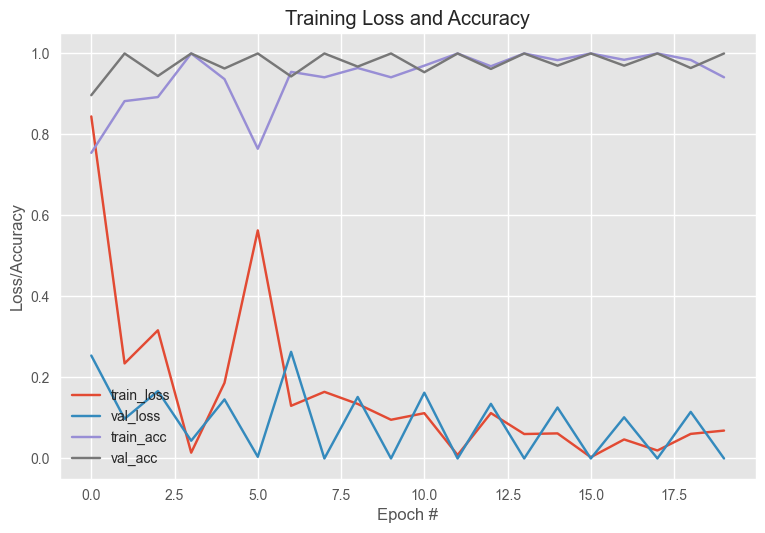

In [34]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [30]:
print("[INFO] model summary...")
model.summary()


[INFO] model summary...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 3, 3, 1280)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,898,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,857,251 (79.56 MB)

 Trainable params: 6,337,355 (24.18 MB)

 Non-trainable params: 1,845,184 (7.04 MB)

 Optimizer params: 12,674,712 (48.35 MB)

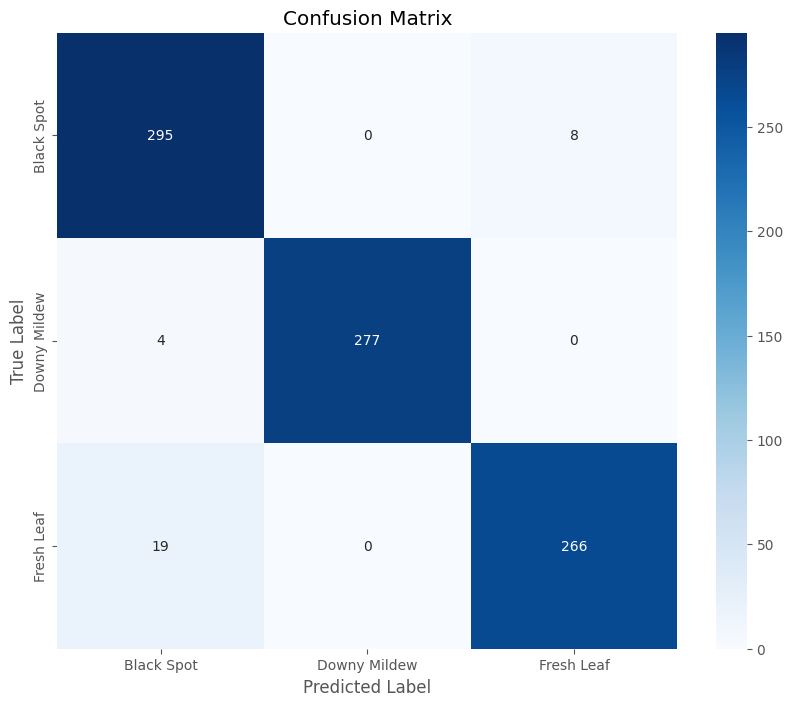

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(testY.argmax(axis=1), predIdxs, labels=range(class_number))

# Create a DataFrame for better plotting with seaborn
import pandas as pd
cm_df = pd.DataFrame(cm, index=mlb.classes_, columns=mlb.classes_)

# Plot using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


C:\Users\ARIF\AppData\Local\Temp\ipykernel_23400\2740728507.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


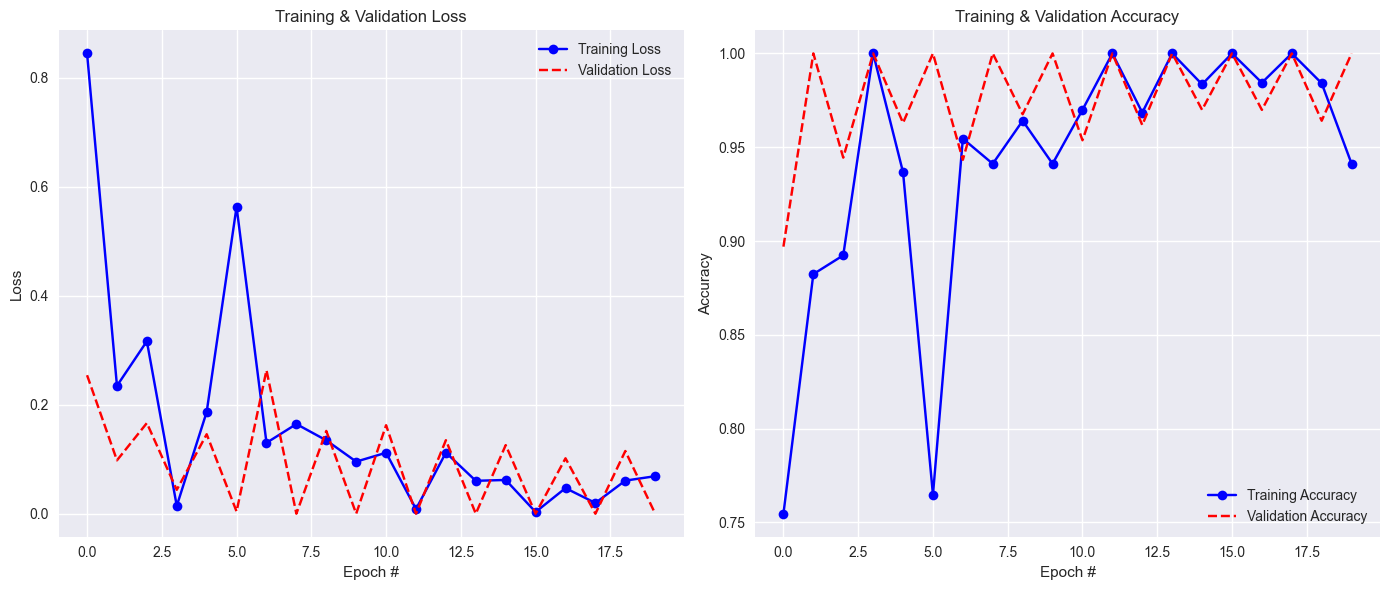

In [33]:
import matplotlib.pyplot as plt

N = 20  # Number of epochs
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(14, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, N), H.history["loss"], label="Training Loss", color='blue', linestyle='-', marker='o')
plt.plot(np.arange(0, N), H.history["val_loss"], label="Validation Loss", color='red', linestyle='--', marker='x')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(True)

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(np.arange(0, N), H.history["accuracy"], label="Training Accuracy", color='blue', linestyle='-', marker='o')
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="Validation Accuracy", color='red', linestyle='--', marker='x')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()


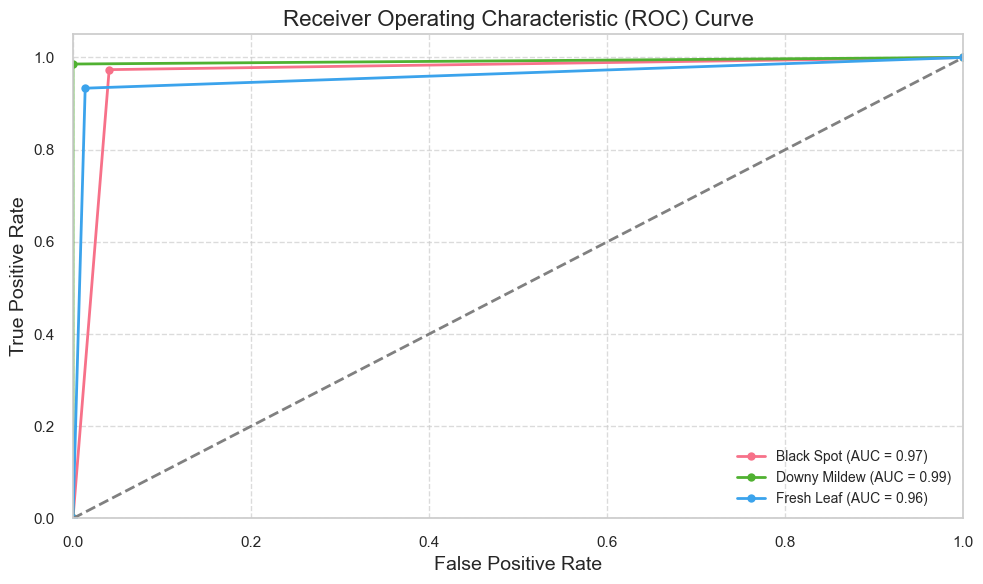

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Binarize the labels
y_true = label_binarize(true_labels, classes=np.arange(class_number))
y_pred = label_binarize(predIdxs, classes=np.arange(class_number))

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(class_number):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set the style and color palette
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))

# Plot ROC curves
colors = sns.color_palette("husl", class_number)  # Use seaborn's husl palette for distinct colors
for i in range(class_number):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{mlb.classes_[i]} (AUC = {roc_auc[i]:.2f})', marker='o')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
